In [29]:
import sys
sys.path.append('C:\Anaconda3\Lib\site-packages')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [2]:
df = pd.read_csv('train.csv')

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
len(np.unique(df.place_id))

In [ ]:
plt.hist(df.place_id, alpha=0.5)
plt.show()

___
### Testing area

In [ ]:
df_test = df.iloc[0:10,:]
y_train = df_test.place_id.values
y_train = np.array([y]).T
y_train

In [ ]:
y_hash = {y: i for i, y in enumerate(np.unique(y_train))}
y_hash

In [ ]:
[y[0] for y in y_train[0]]

In [ ]:
y_hashed = np.array([[y_hash[y[0]] for y in y_train[0]]+[0]]).T
y_hashed

In [ ]:
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(y_hashed).toarray()

In [ ]:
print(y_ohe.sum(axis=0))
print(np.unique(y_train))

### End testing area
___

### Feature engineering and data-viz

In [3]:
# Copy a slice of the dataframe for preliminary work
df2 = df.iloc[0::100, :].copy()
len(df2)

291181

In [4]:
# Hash the place_id's into smaller integers
y_hash = {y: i for i, y in enumerate(np.unique(df2.place_id))}
df2['place_hash'] = df2['place_id'].map(y_hash)
df2.head()

,row_id,x,y,accuracy,time,place_id,place_hash
0,0,0.7941,9.0809,54,470702,8523065625,69752
100,100,9.7952,7.7306,66,748907,1671447920,6372
200,200,7.6501,4.3549,32,486434,2727722673,16193
300,300,0.6356,9.5143,58,166232,6682632876,52684
400,400,5.4186,9.9009,39,645728,9173502385,75760


Make histogram for how often each of the 108390 unique locations is visited.

In [5]:
from collections import Counter
place_counts = Counter(df2.place_hash.values)
# df2['place_counts'] = df2['place_hash'].map(place_counts)
# df2.head()

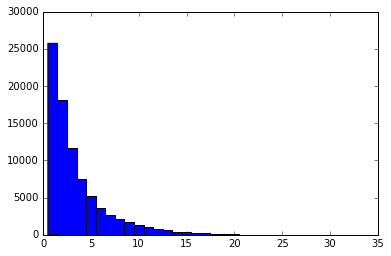

In [6]:
fig = plt.figure(figsize=(10,5))
bins = np.arange(0.5, max(list(place_counts.values()))+1, 1)
plt.hist(list(place_counts.values()),
         bins=bins, alpha=0.5)
plt.xlabel('Number of place_id occurrences')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print("Total number of place_id's:    {}".format(len(df)))
print("Unique place_id's:             {}".format(len(place_counts)))
print('Average number of occurrences: {:.0f}'.format(np.mean(list(place_counts.values()))))

In [ ]:
# ohe = OneHotEncoder()
# y_ohe = ohe.fit_transform(np.array([df_test.place_hash]).T)

# # y_freq = y_ohe.toarray().sum(axis=0) # This gives memory error! Better to use np.asarray
# y_freq = np.asarray(y_ohe).sum(axis=0)

## kNN Classification
First test different features and get a sense of the runtimes. When satisfied with features, do a k-fold cross validation grid search over a range of k's for kNN.

In [22]:
features = ['x', 'y', 'time']
X_train, X_test, y_train, y_test = train_test_split(
    df2[features], df2['place_hash'],
    test_size=0.3, random_state=1)

In [24]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [68]:
clf = KNeighborsClassifier(n_neighbors=20, metric='minkowski', p=2)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

In [69]:
accuracy_score(y_test, y_pred)

0.028389903268273137

In [74]:
test_point = [[1.5,-1.1,0.5]]
probs = clf.predict_proba(test_point)
print(clf.predict(test_point))

ptups = [(clf.classes_[i], p) for i, p in enumerate(probs[0])]
sorted(ptups, key=lambda x: x[1], reverse=True)[:10]

[368]


[(368, 0.10000000000000001),
 (6711, 0.10000000000000001),
 (607, 0.050000000000000003),
 (4066, 0.050000000000000003),
 (18623, 0.050000000000000003),
 (20948, 0.050000000000000003),
 (23700, 0.050000000000000003),
 (25427, 0.050000000000000003),
 (35254, 0.050000000000000003),
 (38256, 0.050000000000000003)]

In [75]:
features = ['x', 'y', 'time']
X_train, X_test, y_train, y_test = train_test_split(
    df2[features], df2['place_hash'],
    test_size=0.3, random_state=1)

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

accuracy_score(y_test, y_pred)

0.051113273424532084

In [76]:
features = ['x', 'y']
X_train, X_test, y_train, y_test = train_test_split(
    df2[features], df2['place_hash'],
    test_size=0.3, random_state=1)

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

accuracy_score(y_test, y_pred)

0.23536145612729667

In [81]:
%%time
features = ['x', 'y']
X_train, X_test, y_train, y_test = train_test_split(
    df2[features], df2['place_hash'],
    test_size=0.3, random_state=1)

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=2, weights='distance',
                           metric='minkowski', p=2)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

print(accuracy_score(y_test, y_pred))

Wall time: 2min 34s


In [83]:
print(clf.score(X_train_std, y_train))
print(accuracy_score(y_test, y_pred))

1.0
0.248251388014


We're getting 100% accuracy on the training set? I should have expected this. It makes sense because the classification model has memorized all the training inputs. Plus we are weighting the closest ones the largest.

In [89]:
%%time
kNN_pipe = Pipeline([('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier(weights='distance',
                                                  metric='minkowski',
                                                  p=2))
                    ])
params = [{'clf__n_neighbors': [2, 3, 4, 5, 6]}]
gs = GridSearchCV(estimator=kNN_pipe,
                  param_grid=params)

gs.fit(X_train, y_train)
print(gs.grid_scores_)

[mean: 0.28119, std: 0.03864, params: {'clf__n_neighbors': 2}, mean: 0.29805, std: 0.04547, params: {'clf__n_neighbors': 3}, mean: 0.30891, std: 0.05092, params: {'clf__n_neighbors': 4}, mean: 0.31439, std: 0.05523, params: {'clf__n_neighbors': 5}, mean: 0.31792, std: 0.05904, params: {'clf__n_neighbors': 6}]
Wall time: 39min 21s


C:\Anaconda3\Lib\site-packages\sklearn\cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


In [92]:
clf = gs.best_estimator_
clf.score(X_test_std, y_test)

0.2867380230095587

Running kNN with k=10 for whole dataset. Not using the hashed `place_id`'s.

In [94]:
%%time
features = ['x', 'y']
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df['place_id'],
    test_size=0.1, random_state=1)

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=10, weights='distance',
                           metric='minkowski', p=2)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)

print(accuracy_score(y_test, y_pred))

0.367671507997
Wall time: 6h 38min 52s


In [102]:
test_point = [[1.5,-1.1]]
probs = clf.predict_proba(test_point)
print(clf.predict(test_point))

ptups = [(clf.classes_[i], p) for i, p in enumerate(probs[0])]
sorted(ptups, key=lambda x: x[1], reverse=True)[:3]

[4647963706]


[(4647963706, 0.29981447490862623),
 (1986164226, 0.28904318663002132),
 (5009679500, 0.1477216522485017)]

Load test data into new dataframe.

In [99]:
df_test = pd.read_csv('test.csv')
df_test.head()

,row_id,x,y,accuracy,time
0,0,0.1675,1.3608,107,930883
1,1,7.3909,2.5301,35,893017
2,2,8.0978,2.3473,62,976933
3,3,0.9990,1.0591,62,907285
4,4,0.6670,9.7254,40,914399


Get top 3 most probable classifications for each sample and output to .csv file for submission.

In [1]:
def write_predictions(file, clf, df):
    with open(file, 'w') as f:
        f.write('row_id,place_id\n')
        for r_id, x, y in zip(df.row_id.values,
                              df.x.values,
                              df.y.values):
            p_id = sorted([(clf.classes_[i], p) for i, p in enumerate(clf.predict_proba([[x, y]])[0])],
                          key=lambda x: x[1], reverse=True)[:3]
            f.write('{0:d},{1:d} {2:d} {3:d}\n'.format(r_id,
                                                       p_id[0][0],
                                                       p_id[1][0],
                                                       p_id[2][0]))
            print(p_id)
            break

In [2]:
%%time
write_predictions('submission_3.csv', clf, df_test)

NameError: name 'clf' is not defined